In [1]:
import Romeo

┌ Info: Precompiling Romeo [fded2ed3-f965-46cb-aa73-cb47ce47d3c4]
└ @ Base loading.jl:1342


In [2]:
using Plots

In [3]:
Δt = 0.1
t = 0:Δt:(1-Δt)
N = length(t);

In [4]:
u = sin.(t)
du = cos.(t);
int_u = 1 .- cos.()

In [5]:
id = Romeo.Operators.dkernel_identity(N)
Δ = Romeo.Operators.dkernel_difference(N);

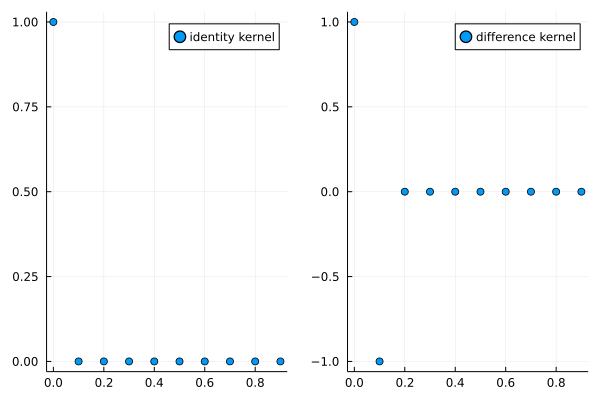

In [6]:
plt1 = plot(t, id, marker=:circle, line=nothing, label="identity kernel")
plt2 = plot(t, Δ, marker=:circle, line=nothing, label="difference kernel")
plot(plt1, plt2)

In [7]:
Δ2 = Romeo.Operators.convolve(Δ, Δ)
Δ3 = Romeo.Operators.convolve(Δ2, Δ);

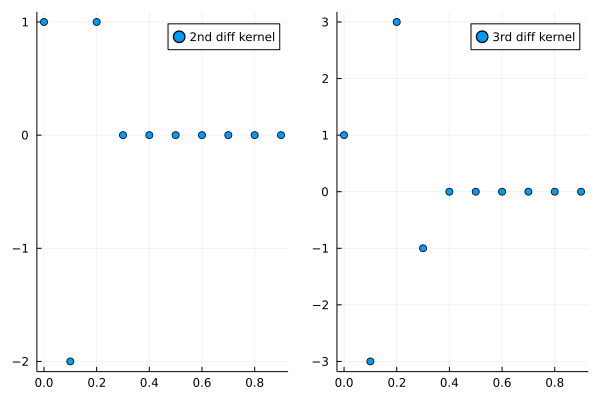

In [8]:
plt1 = plot(t, Δ2, marker=:circle, line=nothing, label="2nd diff kernel")
plt2 = plot(t, Δ3, marker=:circle, line=nothing, label="3rd diff kernel")
plot(plt1, plt2)

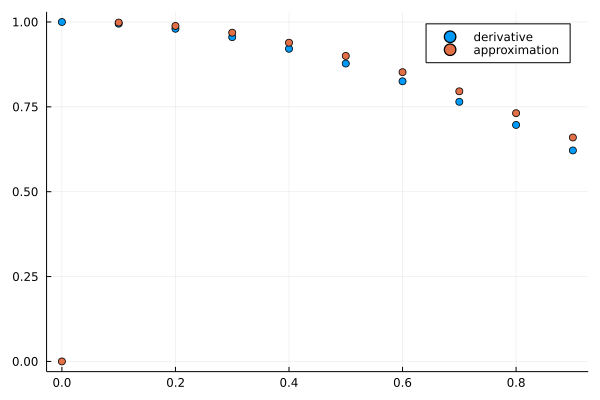

In [9]:
du_approx = Romeo.Operators.convolve(Δ, u) ./ Δt
plot(t, [du du_approx], label=["derivative" "approximation"], marker=:circle, line=nothing)

In [10]:
∑ = Romeo.Operators.dkernel_inverse(Δ)
∑2 = Romeo.Operators.dkernel_inverse(Δ2);

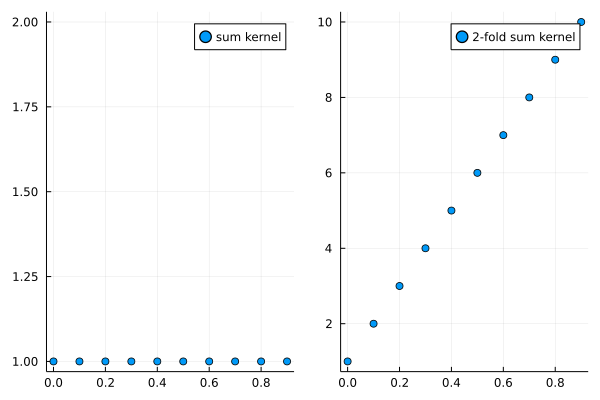

In [13]:
plt1 = plot(t,∑, marker=:circle, line=nothing, label="sum kernel")
plt2 = plot(t, ∑2, marker=:circle, line=nothing, label="2-fold sum kernel")
plot(plt1, plt2)

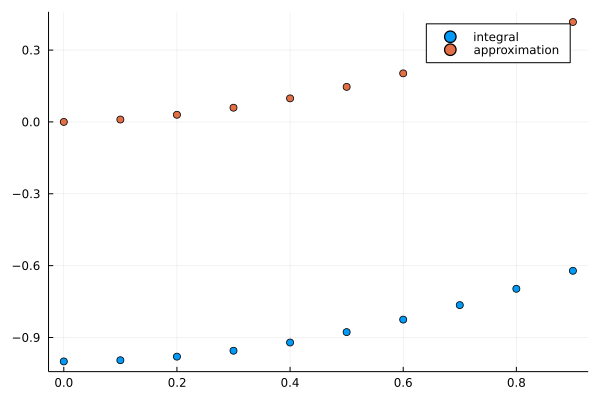

In [14]:
int_u_approx = Romeo.Operators.convolve(∑, u) * Δt
plot(t, [-du int_u_approx], label=["integral" "approximation"], marker=:circle, line=nothing)